In [91]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
cnts = pd.read_csv('/data/project/joebrother/lecture/2021_bioinfo/binfo1/mission_1/binfo1-datapack1/read-counts.txt', sep = '\t', comment='#', index_col=0)

In [26]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])

/data/home/joebrother/.conda/envs/joebrother/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


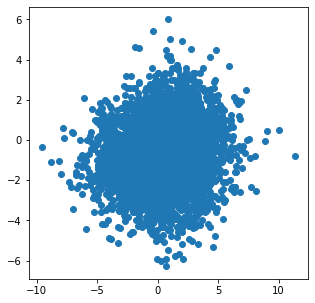

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))

In [28]:
mouselocal = pd.read_csv('/data/project/joebrother/lecture/2021_bioinfo/binfo1/mission_1/mouselocalization-20210507.txt', sep='\t')
mouselocal.rename(columns = {'gene_id' : 'Geneid'}, inplace = True)

In [29]:
cnts.reset_index(inplace = True)

In [37]:
for i in range(len(cnts)):
    cnts['Geneid'][i] = cnts['Geneid'][i].split('.')[0]

merged_data = pd.merge(mouselocal, cnts, how = 'inner', on = 'Geneid')

/data/home/joebrother/.conda/envs/joebrother/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/data/home/joebrother/.conda/envs/joebrother/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='clip_enrichment', ylabel='rden_change'>

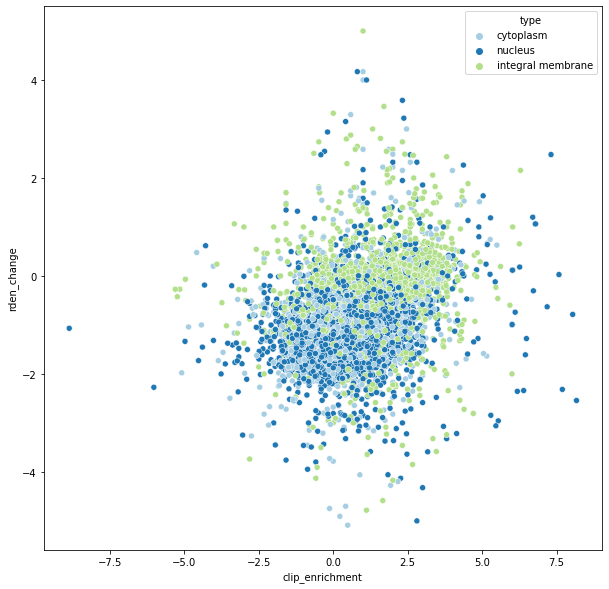

In [92]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = np.log2(merged_data['clip_enrichment']), y = np.log2(merged_data['rden_change']), data = merged_data, hue = 'type', palette = 'Paired')